In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Reading DF with correct datatypes

In [2]:
df = pd.read_csv('Datasets/DF_ML_Ready.csv')
df = pd.read_csv('Datasets/DF_ML_Ready_WeekCases.csv')
#df['ETA']= pd.to_datetime(df['ETA'],format="%Y-%m-%d %H:%M")
#df['ATA']= pd.to_datetime(df['ATA'],format="%Y-%m-%d %H:%M")
df['Days_Before_ETA_Info'] = df['Days_Before_ETA_Info'].astype('int64')


# Droping Irrelavent Coloums and Outliers

In [3]:
df.drop(['ETA'] ,axis=1, inplace=True)
df.drop(['ATA'] ,axis=1, inplace=True)
#df.drop(['ETA_Day'] ,axis=1, inplace=True)
#df.drop(['Vessel_Name'] ,axis=1, inplace=True)
df.drop(['Ship_ID'] ,axis=1, inplace=True)
df.drop(['date'] ,axis=1, inplace=True)

df = df[df.Days_Before_ETA_Info >= 0]  #droping value for negative Days_Before_ETA_Info 
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [4]:
df[['Delay', 'Built_Year', 'Days_Before_ETA_Info', 'ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Hour','new_cases']].corr()
#df[['Delay','Size', 'Dwt', 'Size']].corr()

,Delay,Built_Year,Days_Before_ETA_Info,ETA_Year,ETA_Month,ETA_Weekday,ETA_Hour,new_cases
Delay,1.000000,0.097592,0.175204,0.112164,-0.114388,0.140029,-0.009474,0.128013
Built_Year,0.097592,1.000000,0.102188,-0.105458,0.007841,0.049497,0.062235,-0.028814
Days_Before_ETA_Info,0.175204,0.102188,1.000000,-0.086272,0.208921,0.003800,0.066587,0.187386
ETA_Year,0.112164,-0.105458,-0.086272,1.000000,-0.687369,0.067647,-0.004279,0.300959
ETA_Month,-0.114388,0.007841,0.208921,-0.687369,1.000000,-0.021412,-0.038607,0.044926
ETA_Weekday,0.140029,0.049497,0.003800,0.067647,-0.021412,1.000000,-0.023286,0.106013
ETA_Hour,-0.009474,0.062235,0.066587,-0.004279,-0.038607,-0.023286,1.000000,-0.046357
new_cases,0.128013,-0.028814,0.187386,0.300959,0.044926,0.106013,-0.046357,1.000000


In [5]:
#Converting to days and rouding.
df['Delay']=df['Delay']/60
#df['Delay']=df['Delay']/24
#df['Delay']=df['Delay']/1440 #60*24

df['Delay']=df['Delay'].round(0)

# Ploting to vizualize relation between X_Features and Delay

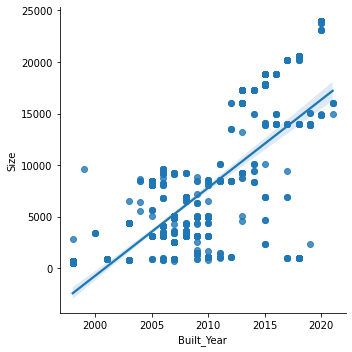

In [6]:
sns.lmplot(x="Built_Year", y="Size", data=df);

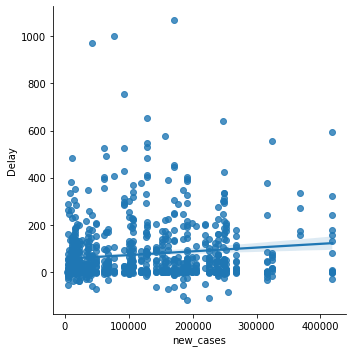

In [7]:
sns.lmplot(x="new_cases", y="Delay", data=df);

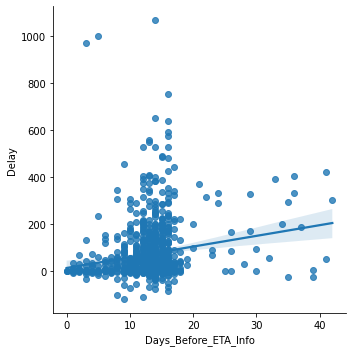

In [8]:
sns.lmplot(x="Days_Before_ETA_Info", y="Delay", data=df);

<AxesSubplot:xlabel='Berth', ylabel='Size'>

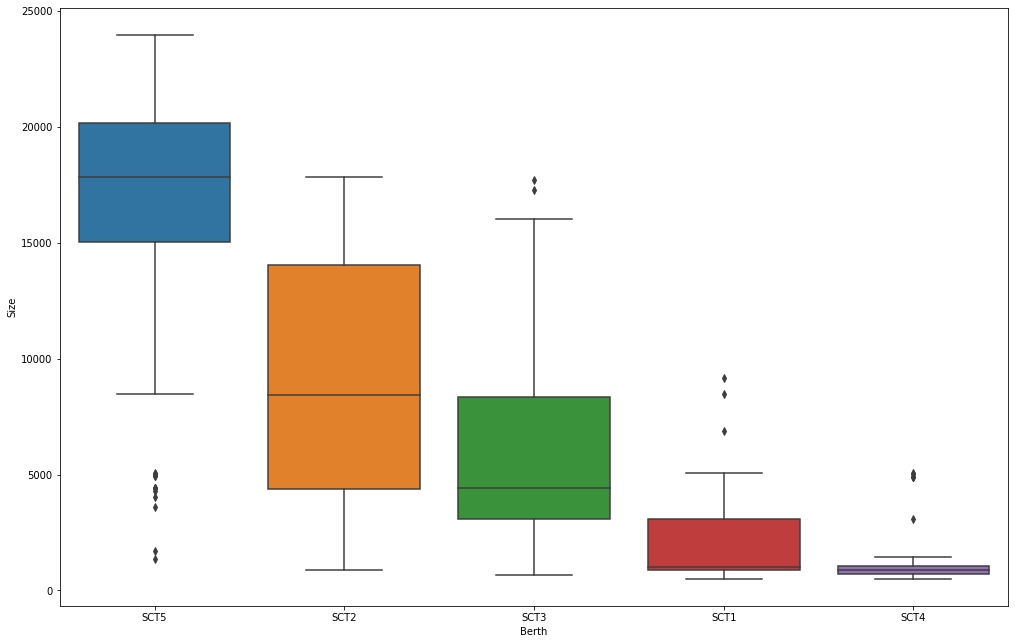

In [9]:
my_order = df.groupby("Berth")["Size"].mean().fillna(0).sort_values()[::-1].index
%matplotlib inline
plt.figure(figsize=(17, 11))

sns.boxplot(x="Berth", y="Size", data=df,order=my_order)

<AxesSubplot:xlabel='Service', ylabel='NextPort'>

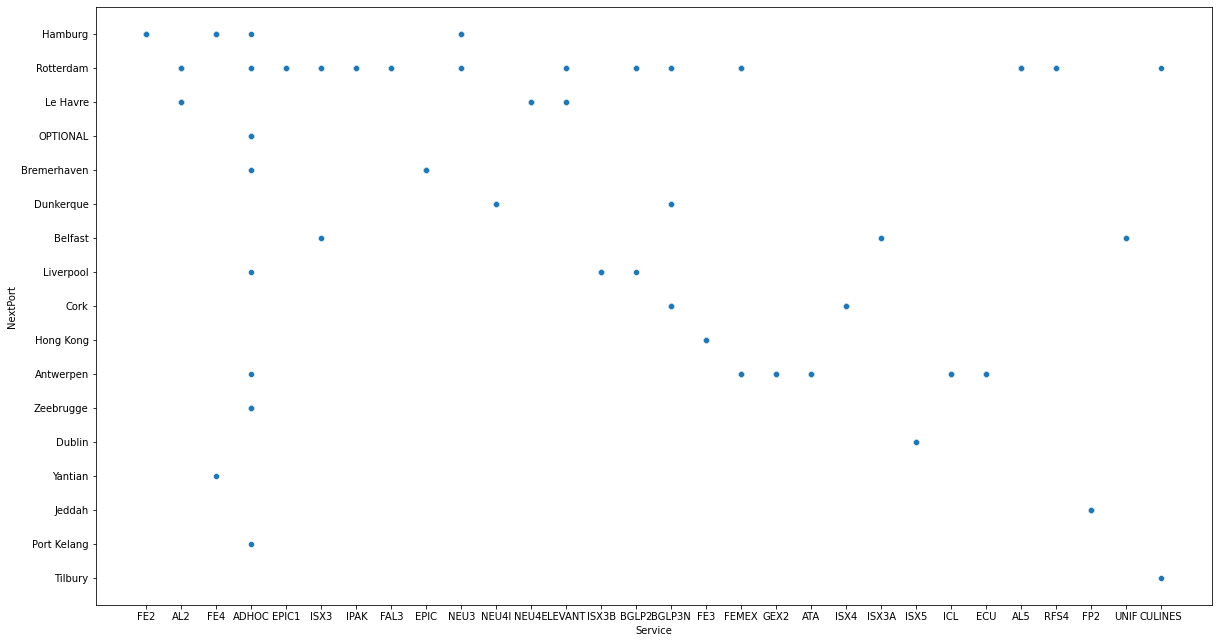

In [10]:
%matplotlib inline
plt.figure(figsize=(20, 11))
sns.scatterplot(x="Service", y="NextPort", data=df)


In [11]:
df[['Delay','Size','Built_Year','Built_Month','Days_Before_ETA_Info','ETA_Year','ETA_Month','ETA_Day','ETA_Weekday','ETA_Hour','new_cases' ]].corr()

,Delay,Size,Built_Year,Built_Month,Days_Before_ETA_Info,ETA_Year,ETA_Month,ETA_Day,ETA_Weekday,ETA_Hour,new_cases
Delay,1.000000,0.087152,0.097646,0.008392,0.175165,0.112284,-0.114431,-0.068592,0.140045,-0.009393,0.128044
Size,0.087152,1.000000,0.732369,-0.085304,0.209906,-0.078108,0.018078,-0.020140,0.063482,0.159799,-0.009551
Built_Year,0.097646,0.732369,1.000000,-0.058841,0.102188,-0.105458,0.007841,-0.045059,0.049497,0.062235,-0.028814
Built_Month,0.008392,-0.085304,-0.058841,1.000000,0.010697,-0.024297,0.010631,-0.011925,-0.049604,-0.016479,-0.039625
Days_Before_ETA_Info,0.175165,0.209906,0.102188,0.010697,1.000000,-0.086272,0.208921,-0.002713,0.003800,0.066587,0.187386
ETA_Year,0.112284,-0.078108,-0.105458,-0.024297,-0.086272,1.000000,-0.687369,-0.021448,0.067647,-0.004279,0.300959
ETA_Month,-0.114431,0.018078,0.007841,0.010631,0.208921,-0.687369,1.000000,-0.016893,-0.021412,-0.038607,0.044926
ETA_Day,-0.068592,-0.020140,-0.045059,-0.011925,-0.002713,-0.021448,-0.016893,1.000000,0.045228,0.032516,-0.003978
ETA_Weekday,0.140045,0.063482,0.049497,-0.049604,0.003800,0.067647,-0.021412,0.045228,1.000000,-0.023286,0.106013
ETA_Hour,-0.009393,0.159799,0.062235,-0.016479,0.066587,-0.004279,-0.038607,0.032516,-0.023286,1.000000,-0.046357


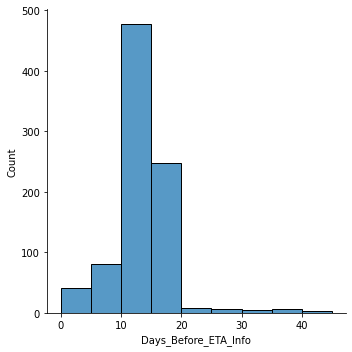

In [12]:
sns.displot(df, x="Days_Before_ETA_Info",binwidth=5)



In [13]:
# Only using Days fore ETA 10days
#df=df.loc[df['Days_Before_ETA_Info'] < 21]
#df=df.loc[df['Delay'] > -1]


# Converting Delay to Catagorical

In [14]:
#add a new column category next to the age group. 
#'''
#For 3 Class
Delay_Cat = pd.cut(df.Delay,bins=[-9999,-12,12,9999],labels=['Early','OnTime','Late'])

#For 2 Class
#Delay_Cat = pd.cut(df.Delay,bins=[-9999,24,9999],labels=['OnTime','Late'])

df.insert(4,'Delay_Cat',Delay_Cat)
df.drop(['Delay'] ,axis=1, inplace=True)
df = df.rename(columns={'Delay_Cat': 'Delay'})
df['Delay']=df['Delay'].astype('category')

del Delay_Cat
#'''

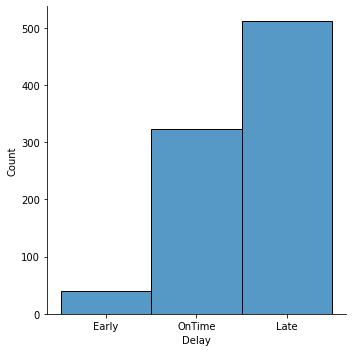

In [15]:
sns.displot(df, x="Delay",binwidth=1)

<AxesSubplot:xlabel='Delay', ylabel='Size'>

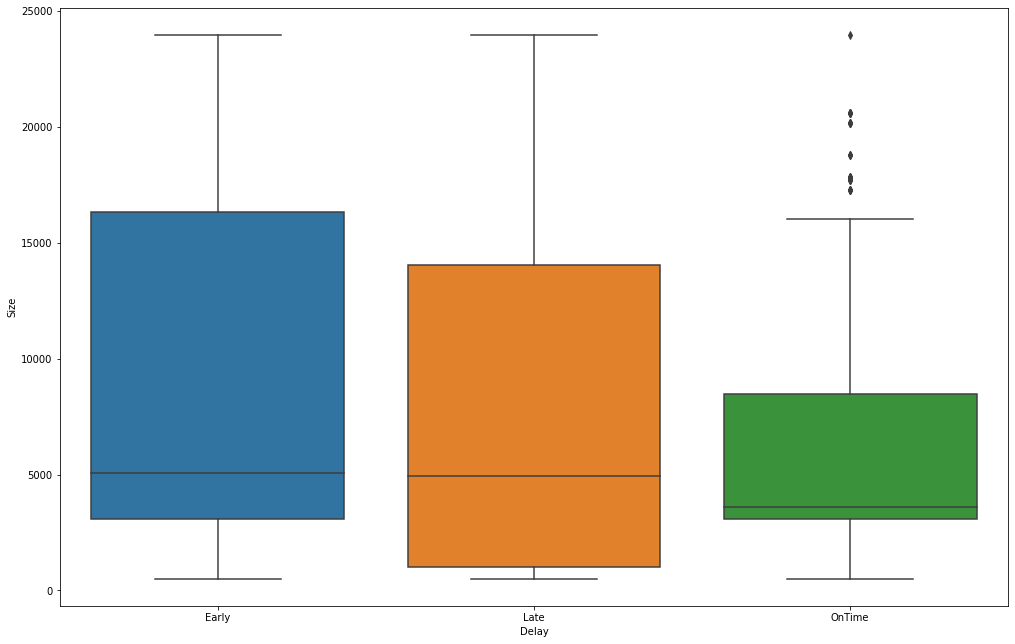

In [16]:
my_order = df.groupby("Delay")["Size"].mean().fillna(0).sort_values()[::-1].index
%matplotlib inline
plt.figure(figsize=(17, 11))

sns.boxplot(x="Delay",
           y="Size",
           data=df,
           order=my_order
            )

# Normalizing Continious Data

In [17]:
df['Size'] = (df['Size'] - df['Size'].min()) / (df['Size'].max()- df['Size'].min())

df['Days_Before_ETA_Info'] = (df['Days_Before_ETA_Info'] - df['Days_Before_ETA_Info'].min()) / (df['Days_Before_ETA_Info'].max()- df['Days_Before_ETA_Info'].min())

df['new_cases'] = (df['new_cases'] - df['new_cases'].min()) / (df['new_cases'].max()- df['new_cases'].min())



In [18]:
#from feature_engine.creation import CyclicalTransformer
#cyclical = CyclicalTransformer(variables=None, drop_original=False)
#abc = cyclical.fit_transform(df[['ETA_Month']])
df['ETA_Month_sin'] = np.sin(2 * np.pi * df['ETA_Month']/12.0)
df['ETA_Month_cos'] = np.cos(2 * np.pi * df['ETA_Month']/12.0)

df['ETA_Weekday_sin'] = np.sin(2 * np.pi * df['ETA_Weekday']/7.0)
df['ETA_Weekday_cos'] = np.cos(2 * np.pi * df['ETA_Weekday']/7.0)

df['ETA_Hour_sin'] = np.sin(2 * np.pi * df['ETA_Hour']/24.0)
df['ETA_Hour_cos'] = np.cos(2 * np.pi * df['ETA_Hour']/24.0)

df['Built_Month_sin'] = np.sin(2 * np.pi * df['Built_Month']/12.0)
df['Built_Month_cos'] = np.cos(2 * np.pi * df['Built_Month']/12.0)

df['ETA_Day_sin'] = np.sin(2 * np.pi * df['ETA_Day']/31)
df['ETA_Day_cos'] = np.cos(2 * np.pi * df['ETA_Day']/31)




In [19]:
#Without Cos And Sin
df=df[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Day', 'ETA_Hour', 'Built_Year', 'Built_Month', 'Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

##For Cosine
#df=df[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos','ETA_Hour_sin','ETA_Hour_cos', 'Built_Year', 'Built_Month_sin', 'Built_Month_cos','Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

# Converting DF to Label Encoding

In [20]:
df_Lab_enc=df.copy()

#Selecting Only Catogorail Varible to label encode
Attribute_Name = ['Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']


label_encoder = preprocessing.LabelEncoder()
for name in Attribute_Name:
    df_Lab_enc[name]= label_encoder.fit_transform(df_Lab_enc[name])

#Attributes to keep for DT and RF Models


df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Day', 'ETA_Hour', 'Built_Year', 'Built_Month', 'Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

#For Cosine
#df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos','ETA_Hour_sin','ETA_Hour_cos', 'Built_Year', 'Built_Month_sin', 'Built_Month_cos','Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

#df Optimised
#df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos', 'ETA_Hour_sin','ETA_Hour_cos', 'Owner','Service']]
df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Month','ETA_Weekday','ETA_Day',  'ETA_Hour', 'Owner','NextPort','Service']]


del Attribute_Name
del label_encoder
del name

# Converting DF to One Hot Encoding

In [21]:
df_OH_enc=df.copy()

'''Attribute_Name = ['Service', 'Berth', 'Side', 'NextPort', 'Flag','Built_Year' ,'Built_Month','Builder', 'Owner', 'Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine' , 'ETA_Year', 'ETA_Month', 'ETA_Weekday', 'ETA_Hour']
Attribute_Name = ['Service','Side','Builder','Owner','Alternative_Fuel','ETA_Year','ETA_Month','ETA_Weekday','ETA_Hour']
df.drop(['Berth', 'NextPort','Flag','Built_Year' ,'Built_Month','SOx_Scrubber', 'Eco_Engine' ] ,axis=1, inplace=True)'''


#Attributes to keep for DT and RF Models #Size and Days are Continus to no need to comvert them

df_OH_enc=df_OH_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Day', 'ETA_Hour', 'Built_Year', 'Built_Month', 'Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]
#For Cosine
#df_OH_enc=df_OH_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos','ETA_Hour_sin','ETA_Hour_cos', 'Built_Year', 'Built_Month_sin', 'Built_Month_cos','Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

Attribute_Name = ['ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Day', 'ETA_Hour', 'Built_Year', 'Built_Month', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort',]

#For Cosine
#Attribute_Name = ['ETA_Year', 'Built_Year', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort',] # 'Built_Year' ,'Built_Month','ETA_Year', 'ETA_Month', 'ETA_Hour', 'ETA_Weekday'

#DF and trribute Optimized
#df_OH_enc=df_OH_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos', 'ETA_Hour_sin','ETA_Hour_cos', 'Owner','Service']]
df_OH_enc=df_OH_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Month', 'ETA_Weekday','ETA_Day',  'ETA_Hour', 'Owner','NextPort','Service']]

Attribute_Name = ['ETA_Month', 'ETA_Weekday','ETA_Day',  'ETA_Hour','Owner','NextPort','Service']


for name in Attribute_Name:
    # Get one hot encoding of columns B
    one_hot = pd.get_dummies(df_OH_enc[name],prefix=name)
    # Drop column B as it is now encoded
    df_OH_enc = df_OH_enc.drop(name,axis = 1)
    # Join the encoded df
    df_OH_enc = df_OH_enc.join(one_hot)

del Attribute_Name,name,one_hot

# Model Testing

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

testsize=0.3
rnseed=1


# Decision Tree


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import tree

x=df_Lab_enc.drop('Delay',axis=1)
y=df_Lab_enc['Delay']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = rnseed)

dt = tree.DecisionTreeClassifier(random_state = 0)

dt = dt.fit(x, y)

'''
y_pred = dt.predict(x_test)

y_pred_train=dt.predict(x_train)


#----------------------------------

#Evaluating the Algorithm

print("Train Data:")
print('Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
#----------------
print("Test Data:")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
'''
Total_results=[]
Total_results_f1=[]
name=[]
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']

results=cross_validate(dt,x,y,cv=10, scoring=scoring)
Total_results.append(results)
name.append('DT')
results['test_f1_macro'].mean()
#print('accuracy :', results_acc['test_accuracy'].mean())
#print('accuracy :', results_acc['test_f1_macro'].mean())


C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.37233204667944764

In [24]:
#result=cross_val_score(svm.SVC(kernel='rbf', gamma=0.7, C = 1.0), X, y,  scoring=make_scorer(f1_score, average='weighted', labels=[2]),  cv=10)

<AxesSubplot:>

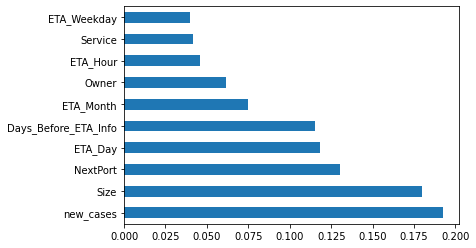

In [25]:
feat_importances = pd.Series(dt.feature_importances_, index=x.columns)
feat_importances.nlargest(99).plot(kind='barh')

# Random Forest

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


x = df_Lab_enc.drop('Delay',axis=1)

y = df_Lab_enc['Delay']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = rnseed)

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

rf.fit(x, y)

y_pred = rf.predict(x_test)

y_pred_train=rf.predict(x_train)


#Evaluating the Algorithm
print("Train Data:")
print('Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
#----------------
print("Test Data:")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

#print('accuracy :', cross_val_score(rf,x,y,cv=10, scoring='accuracy').mean())
#print('f1 :', cross_val_score(rf,x,y,cv=10, scoring='f1_macro').mean())


results=cross_validate(rf,x,y,cv=10, scoring=scoring)
Total_results.append(results)
name.append('RF')
results['test_f1_macro'].mean()


Train Data:
Accuracy: 1.0
Test Data:
Accuracy: 1.0


C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

0.4096573087576025

In [27]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Early','Late', 'OnTime']))




Confusion Matrix

[[ 16   0   0]
 [  0 149   0]
 [  0   0  98]]

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

       Early       1.00      1.00      1.00        16
        Late       1.00      1.00      1.00       149
      OnTime       1.00      1.00      1.00        98

    accuracy                           1.00       263
   macro avg       1.00      1.00      1.00       263
weighted avg       1.00      1.00      1.00       263



<AxesSubplot:>

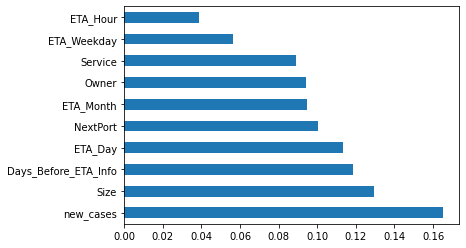

In [28]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(99).plot(kind='barh')

# SVM

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import svm

x=df_OH_enc.drop('Delay',axis=1)

y=df_OH_enc['Delay']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = rnseed)

svm_clf=svm.SVC(kernel='rbf')


svm_clf.fit(x, y)

'''
y_pred = svm_clf.predict(x_test)
y_pred_train = svm_clf.predict(x_train)

#Evaluating the Algorithm
print("Train Data:")
print('Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
#----------------
print("Test Data:")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

print('accuracy :', cross_val_score(svm_clf,x,y,cv=10, scoring='accuracy').mean())
print('f1 :', cross_val_score(svm_clf,x,y,cv=10, scoring='f1_macro').mean())
'''
results=cross_validate(svm_clf,x,y,cv=10, scoring=scoring)
Total_results.append(results)
name.append('SVM')
results['test_f1_macro'].mean()



C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

0.3865980273839022

# Neural Network - MLP

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

x=df_OH_enc.drop('Delay',axis=1)
y=df_OH_enc['Delay']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = rnseed)

mlp = MLPClassifier(hidden_layer_sizes=(1), activation='relu', solver='adam') #50,25,10,5

'''
mlp.fit(x_train, y_train) 

y_pred = mlp.predict(x_test)
y_pred_train = mlp.predict(x_train)

#Evaluating the Algorithm
print("Train Data:")
print('Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
#----------------
print("Test Data:")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(mlp,x,y,cv=10)
'''
results=cross_validate(mlp,x,y,cv=2, scoring=scoring)
Total_results.append(results)
name.append('NN')
results['test_f1_macro'].mean()

C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetri

0.32849506113729837

In [31]:
graph_accu_accuracy=[]
graph_accu_f1=[]
for i in range(4):
    print(name[i])
    print('Accuracy',Total_results[i]['test_accuracy'].mean())
    print('Precision',Total_results[i]['test_precision_macro'].mean())
    print('Recall',Total_results[i]['test_recall_macro'].mean())
    print('F1',Total_results[i]['test_f1_macro'].mean(),'\n')

    graph_accu_accuracy.append(Total_results[i]['test_accuracy'])
    graph_accu_f1.append(Total_results[i]['test_f1_macro'])
    
    
    
    

DT
Accuracy 0.5067006269592476
Precision 0.3909370303273829
Recall 0.39034162324603494
F1 0.37233204667944764 

RF
Accuracy 0.6301854754440962
Precision 0.4201279202541926
Recall 0.4283692410530646
F1 0.4096573087576025 

SVM
Accuracy 0.6210553814002089
Precision 0.4015943041817779
Recall 0.40881324557795146
F1 0.3865980273839022 

NN
Accuracy 0.5936073059360731
Precision 0.30243529674252567
Recall 0.36989615483539096
F1 0.32849506113729837 



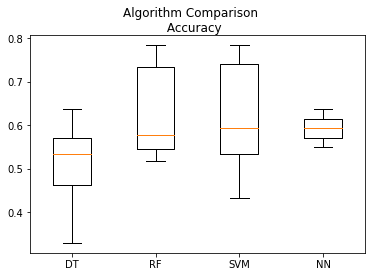

In [32]:
# boxplot algorithm comparison
fig = plt.figure() #figsize=(10, 10)
fig.suptitle('Algorithm Comparison \n Accuracy')

ax = fig.add_subplot(111)
plt.boxplot(graph_accu_accuracy)
ax.set_xticklabels(name)
plt.show()

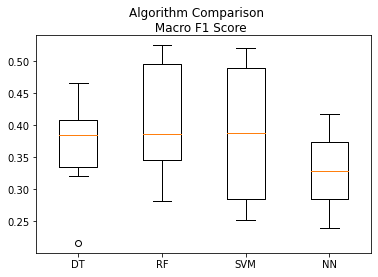

In [33]:
# boxplot algorithm comparison
fig = plt.figure() #figsize=(10, 10)
fig.suptitle('Algorithm Comparison \n Macro F1 Score')

ax = fig.add_subplot(111)
plt.boxplot(graph_accu_f1)
ax.set_xticklabels(name)
plt.show()

In [34]:
#sns.boxplot(x=[graph_accu[0],graph_accu[1]] )

In [35]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Early', 'Late', 'OnTime']))

Confusion Matrix

[[ 16   0   0]
 [  0 149   0]
 [  0   0  98]]

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

       Early       1.00      1.00      1.00        16
        Late       1.00      1.00      1.00       149
      OnTime       1.00      1.00      1.00        98

    accuracy                           1.00       263
   macro avg       1.00      1.00      1.00       263
weighted avg       1.00      1.00      1.00       263



# Regresor

In [36]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Early,Late,OnTime,All
True,,,,
Early,16,0,0,16
OnTime,0,0,98,98
Late,0,149,0,149
All,16,149,98,263
